# Banking Customer Churn Model


## import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import data

In [43]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [44]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [46]:
df.duplicated('CustomerId').sum()

0

In [47]:
df = df.set_index('CustomerId')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


## Encoding

In [49]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [50]:
df = df.replace({'Geography' : {'France': 2,'Germany':1,'Spain':0}})

C:\Users\user\AppData\Local\Temp\ipykernel_9644\1678119478.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Geography' : {'France': 2,'Germany':1,'Spain':0}})


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  int64  
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1015.6+ KB


In [52]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [53]:
df = df.replace({'Gender':{'Male':0,'Female':1}})

C:\Users\user\AppData\Local\Temp\ipykernel_9644\1183325979.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Gender':{'Male':0,'Female':1}})


In [55]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [56]:
df = df.replace({'Num Of Products':{1 : 0,2:1,3:1,4:1}})

In [57]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [58]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [61]:
df.loc[df['Balance']==0,'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [65]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

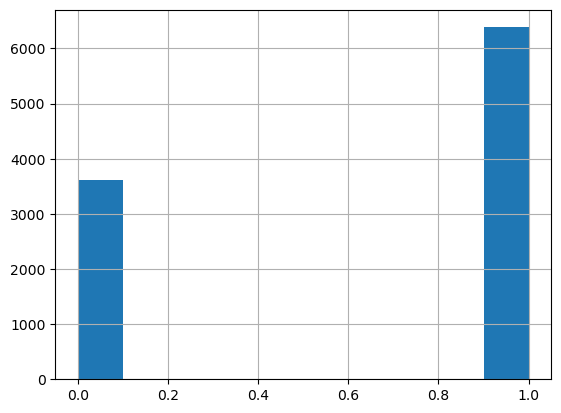

In [69]:
df['Zero Balance'].hist()

## Define Labels and Features

In [70]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [71]:
X = df.drop(['Surname','Churn'],axis = 1)

In [101]:
Y = df['Churn']

In [77]:
X.shape,Y.shape

((10000, 11), (10000,))

<Axes: xlabel='Churn', ylabel='count'>

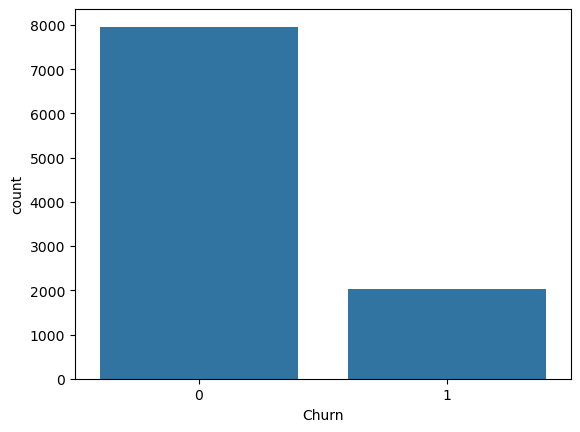

In [78]:
sns.countplot(x = 'Churn', data = df)

## Random Under Sampling

In [85]:
from imblearn.under_sampling import RandomUnderSampler

In [86]:
rus = RandomUnderSampler(random_state = 0)
X_rus,Y_rus = rus.fit_resample(X,Y)

In [87]:
X_rus.shape,Y_rus.shape,X.shape,Y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

## Random Over Sampling

In [88]:
from imblearn.over_sampling import RandomOverSampler

In [90]:
ros = RandomOverSampler(random_state = 0)

In [91]:
X_ros,Y_ros = ros.fit_resample(X,Y)

In [92]:
X_ros.shape,Y_ros.shape

((15926, 11), (15926,))

In [99]:
X_ros.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Zero Balance'],
      dtype='object')

In [102]:
Y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

## Train Test Split

In [103]:
from sklearn.model_selection import train_test_split

## Original Split Data

In [126]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

## Split Random Under Sampling Data

In [127]:
X_rus_train,X_rus_test,Y_rus_train,Y_rus_test = train_test_split(X_rus,Y_rus)

## Split Random Under Sampling Data

In [139]:
X_ros_train,X_ros_test,Y_ros_train,Y_ros_test = train_test_split(X_ros,Y_ros)

## Standize Features

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
sc = StandardScaler()

In [142]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

## Standerdize Original Data

In [143]:
X_train[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [144]:
X_test[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

## Standerdize Random Under Sampling Data

In [145]:
X_rus_train[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_rus_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [146]:
X_rus_test[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_rus_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

## Standerdize Random Over Sampling Data

In [147]:
X_ros_train[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_ros_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [148]:
X_ros_test[['CreditScore','Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_ros_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

## Support Vector Machine ClassifIer

## Modeling Original Data

In [149]:
from sklearn.svm import SVC

In [150]:
svc = SVC()

In [152]:
svc.fit(X_train,Y_train)

SVC()

In [153]:
y_predict = svc.predict(X_test)

### Model Accuracy

In [155]:
from sklearn.metrics import confusion_matrix, classification_report

In [158]:
confusion_matrix(Y_test,y_predict)

array([[1957,   27],
       [ 384,  132]], dtype=int64)

In [159]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.90      1984
           1       0.83      0.26      0.39       516

    accuracy                           0.84      2500
   macro avg       0.83      0.62      0.65      2500
weighted avg       0.83      0.84      0.80      2500



### HyperParameter Tuning

In [160]:
from sklearn.model_selection import GridSearchCV

In [163]:
param_grid = {
    'C' : [0.1,1,10],
    'gamma' : [1,0.1,0.01],
    'kernel' : ['rbf'],
    'class_weight' : ['balanced']
}

In [165]:
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose=2, cv=2)
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [169]:
grid_predict = grid.predict(X_test)

In [170]:
confusion_matrix(Y_test,grid_predict)

array([[1784,  200],
       [ 313,  203]], dtype=int64)

In [171]:
print(classification_report(Y_test,grid_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1984
           1       0.50      0.39      0.44       516

    accuracy                           0.79      2500
   macro avg       0.68      0.65      0.66      2500
weighted avg       0.78      0.79      0.79      2500



## Modeling Random Under Sampling

In [149]:
from sklearn.svm import SVC

In [150]:
svc = SVC()

In [172]:
svc.fit(X_rus_train,Y_rus_train)

SVC()

In [173]:
y_rus_predict = svc.predict(X_rus_test)

### Model Accuracy

In [174]:
confusion_matrix(Y_rus_test,y_rus_predict)

array([[386, 136],
       [132, 365]], dtype=int64)

In [175]:
print(classification_report(Y_rus_test,y_rus_predict))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       522
           1       0.73      0.73      0.73       497

    accuracy                           0.74      1019
   macro avg       0.74      0.74      0.74      1019
weighted avg       0.74      0.74      0.74      1019



### HyperParameter Tuning

In [176]:
grid.fit(X_rus_train,Y_rus_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [177]:
grid_rus_predict = grid.predict(X_rus_test)

In [179]:
confusion_matrix(Y_rus_test,grid_rus_predict)

array([[393, 129],
       [130, 367]], dtype=int64)

In [180]:
print(classification_report(Y_rus_test,grid_rus_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       522
           1       0.74      0.74      0.74       497

    accuracy                           0.75      1019
   macro avg       0.75      0.75      0.75      1019
weighted avg       0.75      0.75      0.75      1019



## Modeling Random Over Sampling

In [181]:
svc.fit(X_ros_train,Y_ros_train)

SVC()

In [182]:
y_ros_predict = svc.predict(X_ros_test)

### Model Accuracy

In [183]:
confusion_matrix(Y_ros_test,y_ros_predict)

array([[1515,  471],
       [ 505, 1491]], dtype=int64)

In [185]:
print(classification_report(Y_ros_test,y_ros_predict))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1986
           1       0.76      0.75      0.75      1996

    accuracy                           0.75      3982
   macro avg       0.75      0.75      0.75      3982
weighted avg       0.75      0.75      0.75      3982



### HyperParameter Tuning

In [186]:
grid.fit(X_ros_train,Y_ros_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [187]:
grid_ros_predict = grid.predict(X_ros_test)

In [188]:
confusion_matrix(Y_ros_test,grid_ros_predict)

array([[1710,  276],
       [  67, 1929]], dtype=int64)

In [189]:
print(classification_report(Y_ros_test,grid_ros_predict))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1986
           1       0.87      0.97      0.92      1996

    accuracy                           0.91      3982
   macro avg       0.92      0.91      0.91      3982
weighted avg       0.92      0.91      0.91      3982

